<a href="https://colab.research.google.com/github/MachuEngine/python-bigdata-colab-practice/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>#  HW3. 기온데이터 중 1월과 8월의 최고 기온을 히스토그램으로 표현
학번: A70064, 이름: 안종민

In [7]:
from google.colab import drive
import os
import csv

# 한글 폰트 설치 & 캐시 갱신
# 시스템에 나눔글꼴 설치 (fonts-nanum)
!apt-get install fonts-nanum -qq
# 새로 설치된 폰트를 Matplotlib 등에서 인식하도록 캐시 갱신
!fc-cache -fv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

### 환경 설정 및 한글 폰트 로드

1. **라이브러리 임포트**
- `google.colab.drive`: Colab에서 내 Google Drive를 마운트해 파일에 접근하기 위해 사용
- `os`: 파일 경로를 다루거나 현재 작업 디렉토리를 확인할 때 사용
- `csv`: CSV 형식의 데이터를 읽고 쓸 때 사용

2. **나눔글꼴 설치 & 캐시 갱신**
- `!apt-get install fonts-nanum -qq`
  - Ubuntu의 `apt` 패키지 매니저를 통해 ‘fonts-nanum’ 패키지를 설치
  - `-qq` 옵션은 설치 로그를 최소화하여 셀 출력이 깔끔해지도록 함
- `!fc-cache -fv`
  - Fontconfig의 캐시를 강제로(`-f`) 다시 생성하고(`-v`: 자세히 출력) 시스템에 새로 설치된 폰트를 즉시 인식하게 만듦

3. **Matplotlib 임포트**
- `matplotlib.pyplot`: 그래프(라인, 바, 산점도 등)를 그릴 때 사용
- `matplotlib.font_manager`: 나눔글꼴(TTF 파일)을 Matplotlib에 등록하고, 그래프 제목·축 레이블 등에 한글 폰트를 적용할 때 사용

In [8]:
drive.mount('./gdrive', force_remount=True)
print(os.getcwd())

Mounted at ./gdrive
/content


### Google Drive 마운트
- gdrive로 My Google Drive를 마운트 합니다.

In [9]:
# [데이터 수집]

f = open('./gdrive/MyDrive/Colab Notebooks/ch4_temperature/temperature.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')

# 헤더 건너 뛰기
header = next(data)  # ['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

# 1월/8월 최고기온 리스트 초기화
january_high_temp = []
august_high_temp = []

# 데이터 수집 시작
for row in data:
  # 빈 행은 건너뛰기
  if not row:
    continue

  # 컬럼 개수가 기대치(여기선 최소 5개)보다 작으면 건너뛰기
  if len(row) < 5:
    continue

  # 날짜 데이터 -로 split한 후 year, month, day에 각각 저장
  try:
    year, month, day = map(int, row[0].split('-'))
  except (ValueError, AttributeError):
    # row[0]이 "YYYY-MM-DD" 가 아닐 때
    continue

  # 1월과 8월 최고기온을 리스트에 각각 저장
  if month == 1:
    try:
      row[-1] = float(row[-1])
    except ValueError:
      continue
    january_high_temp.append(float(row[-1]))
  elif month == 8:
    try:
      row[-1] = float(row[-1])
    except ValueError:
      continue
    august_high_temp.append(float(row[-1]))

# 데이터 수집 종료
f.close()

### 메인 동작

1. CSV 파일 열기
- `cp949` 인코딩으로 읽어옴

2. 헤더 제거
- 첫 줄(컬럼명) 은 데이터가 아니므로 스킵

3. 루프별 검증
- 빈 행 또는 컬럼 수가 5개 미만인 행 건너뜀
- 날짜 칼럼을 파싱하지 못하면 건너뜀

4. 필터링
- 1월과 8월인 경우에만 처리

5. 기온 값 변환 및 저장
- 문자열 형태의 최고 기온을 `float` 로 변환
- `january_high_temp`, `august_high_temp` 리스트에 추가

6. 파일 종료
- `f.close()` 로 파일 핸들 정리

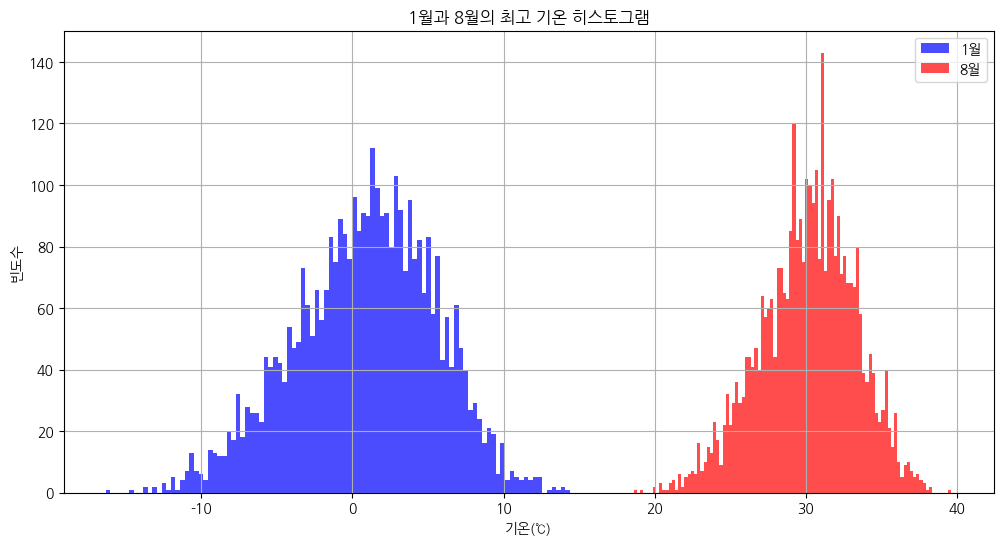

In [10]:
# [데이터 시각화]

# 폰트 파일 경로 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# 폰트를 Matplotlib 전역에 추가
fm.fontManager.addfont(font_path)
# 폰트 내부 이름 확인 (optional)
font_prop = fm.FontProperties(fname=font_path)
# rcParams 에서 이 이름을 기본 폰트로 설정
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

plt.figure(figsize=(12, 6))

# 1월 최고기온 히스토그램 (파랑)
plt.hist(january_high_temp, bins=100, color='blue', alpha=0.7, label='1월')

# 8월 최고기온 히스토그램 (빨강)
plt.hist(august_high_temp, bins=100, color='red', alpha=0.7, label='8월')

# 그래프 제목 및 축 레이블 설정
plt.title('1월과 8월의 최고 기온 히스토그램')
plt.xlabel('기온(℃)')
plt.ylabel('빈도수')
plt.legend()
plt.grid(True)
plt.show()

### 결과 출력 - 데이터 시각화

1. 폰트 등록
- `fm.fontManager.addfont()` 로 TTF 파일을 추가
- `FontProperties` 로 내부 이름을 알아낸 뒤 `plt.rc()` 에 설정

2. 히스토그램 작성
- 1월 히스토그램
  - `january_high_temp` 리스트를 히스토그램 형태로 시각화.
  - `bin` 수 = 100: 기온을 100개의 구간으로 나누어 빈도 표시.
  - 파란색(`blue`), 반투명도(`alpha`=0.7) 설정.
- 8월 히스토그램
  - `august_high_temp` 리스트를 히스토그램 형태로 시각화.
  - 빨간색(`red`)으로 표시하여 1월과 구분.